# Udacity: Deep Learning

In [1]:
# should we be using Python 2 or 3? Assume 2 but import stuff from the future...
from __future__ import print_function

## L1 Machine Learning to Deep Learning

### Course Overview

Four sessions.

Session one:

* Logistic classification
* Stochastic optimization
* Data & parameter tuning

Session two:

* Deep networks
* Regularization

Session three:

* Convolutional networks

Session four:

* Recurrent models
* Embedding

Assignments are IPython notebooks running TensorFlow.

### Solving Problems - Big and Small

Deep learning is a family of techniques.

### Let's Get Started!

<img src="./Screen_Shot_2016-01-22_at_8.38.14_AM.png">

* 2009 Speech recognition
* 2012 Computer vision
* 2014 Machine translation

Data and GPUs!

### Supervised Classification

Classification is the process of taking an input and giving it a label. The following tasks build on the concepts of classification:

* regression
* reinforcement learning
* ranking
* detection

### Classification for Detection Quiz

What approach to detecting pedestrians?

Look for people shaped objects in a variety of poses (they may appear to be standing still or walking/running or pushing a cart, etc.). In principle, train a convolutional network to look for these shapes based on many examples.

Typical answer from Udacity: Run a binary classifier over different areas of an image and mark the areas with a positive label as detected instances. (Nice answer!)

### Classification for Ranking Quiz

Web search ranking. What results are relevant for a query?

Scrape links for keywords from the query and initially return the results with the best overall match. The algorithm can be improved in real time by weighting up links that people actually click on when shown the results.

Typical answer from Udacity: One way of doing this is to classify pairs of `(<query>, <web page>)` as relevant/not-relevant.

### Let's make a deal

### Training Your Logistic Classifier

`WX + b = Y`

Logistic classifiers are _linear_. The vector of inputs are multiplied by a vector of weights and have a bias term added. We want to find `W` and `b` to do classify well. Each input may have one and only one label, so we compute probabilities for each label, using a _softmax_ function.

\begin{equation}
S(y_i) = \frac{e^{y_i}}{\sum_j e^{y_j}}
\end{equation}

We call our scores "logits" and use the softmax to convert them into probabilities.

### Softmax

In [2]:
import numpy as np

In [3]:
scores = [3.0, 1.0, 0.2]

In [4]:
def softmax(X):
    exps = np.exp(X)
    sm = exps / np.sum(exps)
    return sm

In [5]:
print(softmax(scores))

[ 0.8360188   0.11314284  0.05083836]


In [6]:
print(np.sum(softmax(scores)))

1.0


In [7]:
import matplotlib.pyplot as plt

In [8]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

In [9]:
%matplotlib inline

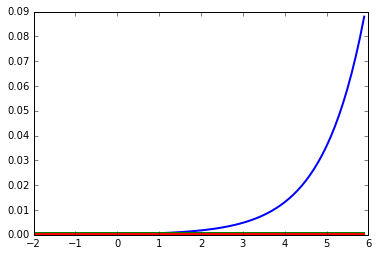

In [10]:
plt.plot(x, softmax(scores).T, linewidth=2)

In [11]:
import theano.tensor as T

In [12]:
from theano import function

In [13]:
y = T.dvector('y')
softm = function(inputs=[y], outputs=T.nnet.softmax(y))

In [14]:
softm([3.0, 1.0, 0.2])

array([[ 0.8360188 ,  0.11314284,  0.05083836]])

In [19]:
np.shape(scores[0])

(80,)

In [33]:
t = [[3.0, 1.0, 0.2], [0.5, 0.5, 0.5], [0.1, 0.1, 0.1]]
np.exp(t)

array([[ 20.08553692,   2.71828183,   1.22140276],
       [  1.64872127,   1.64872127,   1.64872127],
       [  1.10517092,   1.10517092,   1.10517092]])

In [35]:
np.sum(np.exp(t), axis=1)

array([ 24.02522151,   4.94616381,   3.31551275])

So, we need to be very careful about the _axis_ and the _shape_ of what we're doing! 

In [43]:
def softmax(X):
    exps = np.exp(X)
    sm = exps / np.sum(exps, axis=0)
    return sm

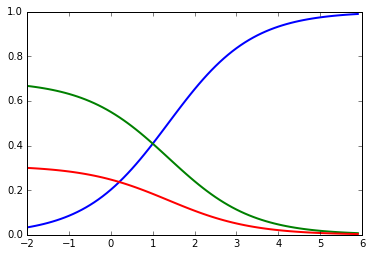

In [44]:
plt.plot(x, softmax(scores).T, linewidth=2)

In [45]:
np.shape(scores)

(3, 80)

In [46]:
np.shape(np.exp(scores))

(3, 80)

In [47]:
np.shape(np.sum(np.exp(scores), axis=0))

(80,)

In [48]:
np.shape(np.sum(np.exp(scores), axis=1))

(3,)

In [49]:
np.shape(np.exp(scores) / np.sum(np.exp(scores), axis=0))

(3, 80)